In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
type(df['total_rooms'])
#df[columns] is a series

pandas.core.series.Series

In [6]:
type(df[['total_rooms']])
#df[columns] is a dataframe

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


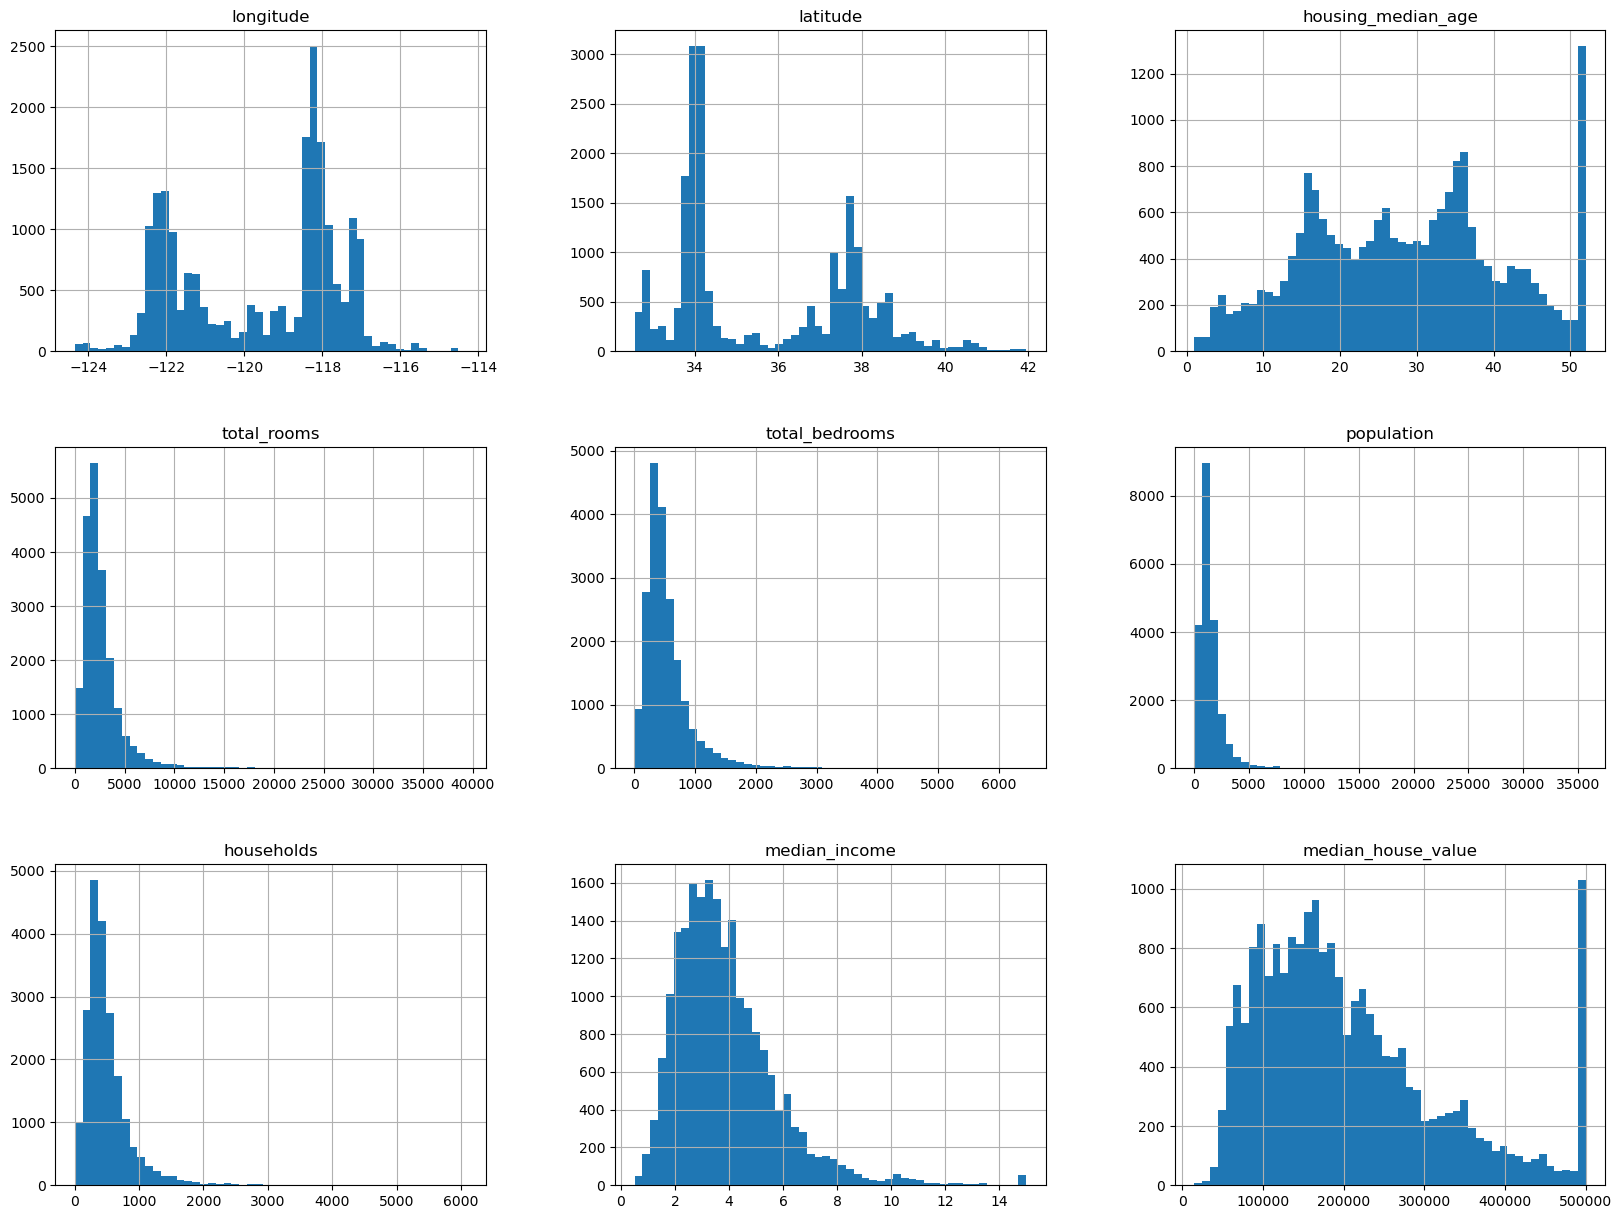

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
# median income may be capped at 15(approx) and definitely x_axis has values in soemthing like thousand and tens of thousand.
# seems like median_house_value is also capped. This may be a problem if prediction has to be done for higher values.

In [12]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train_set.shape

(16512, 10)

In [15]:
test_set.shape

(4128, 10)

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [17]:
type(df['median_income'])

pandas.core.series.Series

In [18]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0.0,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])

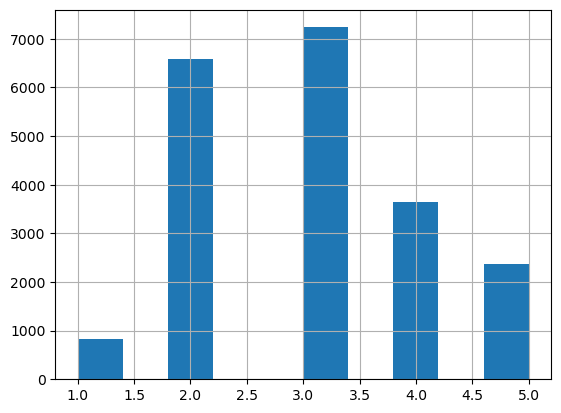

In [19]:
df['income_cat'].hist()
plt.show()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [23]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,2
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,5
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,2
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,2
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,3


In [24]:
strat_train_set.drop('income_cat', axis = 1,inplace=True)
strat_test_set.drop('income_cat', axis = 1,inplace=True)

In [25]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN


In [26]:
df_train = strat_train_set.copy()
df_test = strat_test_set.copy()

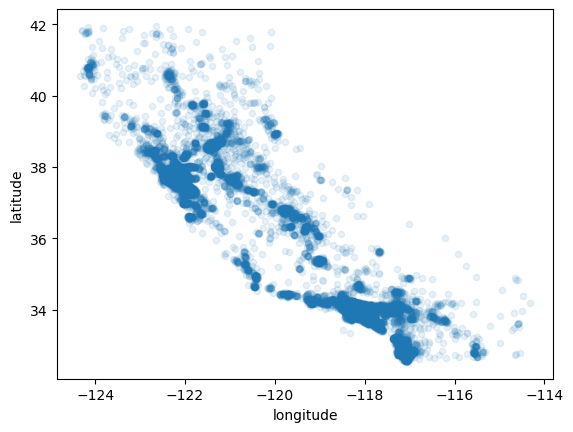

In [27]:
df_train.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

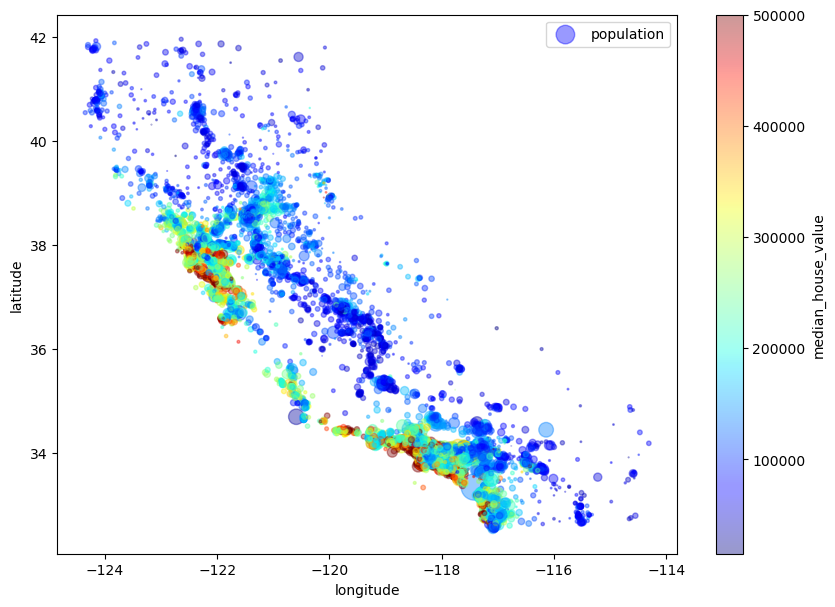

In [28]:
df_train.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
             s=df_train['population']/100, label = 'population', figsize=(10,7),
             c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [29]:
# housing prices near the ocean are very high.

In [30]:
corr_matrix = df_train.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

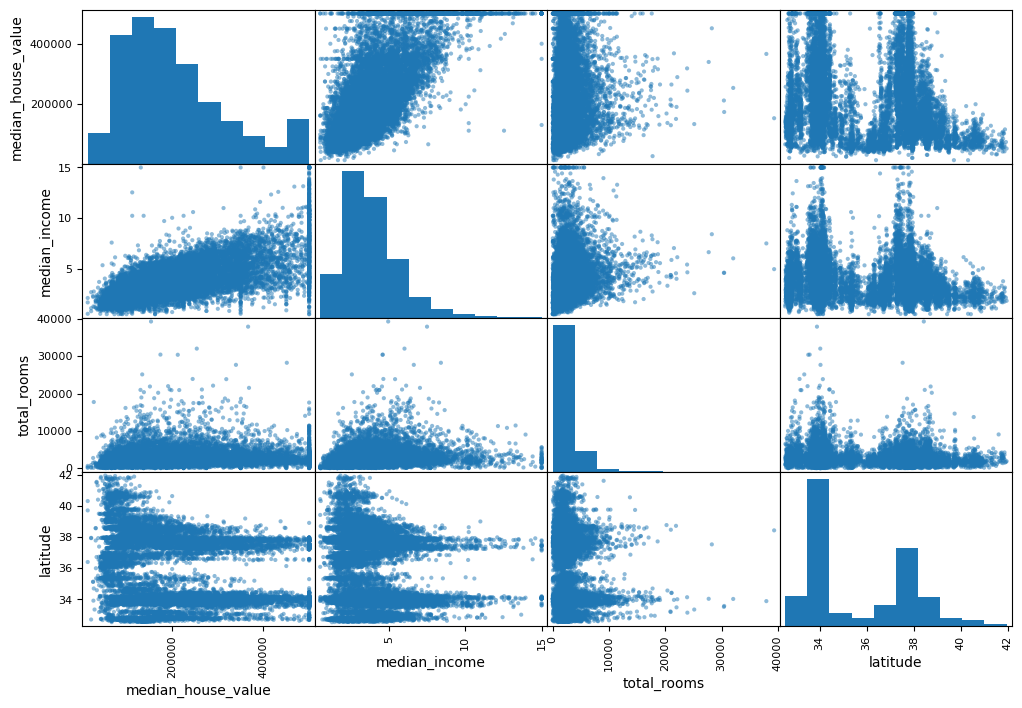

In [32]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'latitude']
scatter_matrix(df_train[attributes], figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

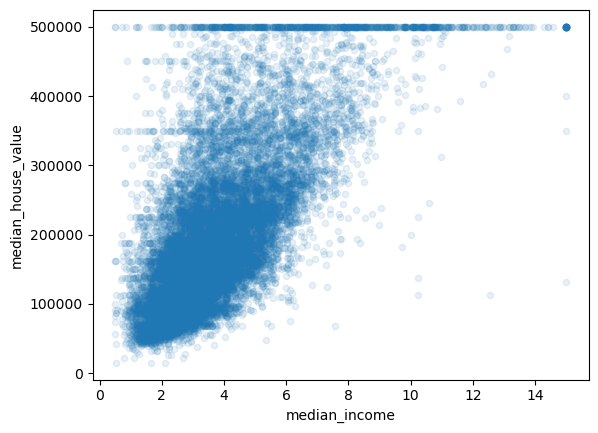

In [33]:
df_train.plot(kind = 'scatter', x='median_income', y='median_house_value', alpha=0.1)

In [34]:
# Capping of price is clearly visible.
# some horizintal lines are visible at around 450,000, 350,000 and some more.

In [35]:
df_train['rooms_per_household'] = df_train['total_rooms']/ df_train['households']
df_train['bedrooms_per_room'] = df_train['total_bedrooms']/ df_train['total_rooms']
df_train['population_per_household'] = df_train['population']/ df_train['households']

In [36]:
corr_matrix = df_train.corr()

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [38]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [39]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,<1H OCEAN


In [40]:
housing_labels

12655     72100
15502    279600
2908      82700
14053    112500
20496    238300
          ...  
15174    268500
12661     90400
19263    140400
19140    258100
19773     62700
Name: median_house_value, Length: 16512, dtype: int64

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)
housing_cat = housing[['ocean_proximity']]
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
imputer.fit(housing_num)
x=imputer.transform(housing_num)

In [45]:
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [46]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index = housing_num.index)

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN


In [48]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [49]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [50]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [51]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

In [54]:
type(housing_extra_attribs)

numpy.ndarray

In [55]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household","bedrooms_per_room"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND,5.485836,3.168555,0.205784
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN,6.927083,2.623698,0.160714
2908,-119.04,35.37,44,1618,310.0,667,300,2.875,INLAND,5.393333,2.223333,0.191595
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN,3.886128,1.859213,0.276505
20496,-118.7,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN,6.096552,3.167241,0.182692


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [57]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [59]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
housing_prepared.shape

(16512, 16)

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(housing_prepared, housing_labels)

LinearRegression()

In [62]:
some_data = housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [63]:
some_data_prepared = full_pipeline.transform(some_data)

In [64]:
print("Predictions: ", regressor.predict(some_data_prepared))
print("Real values: ", list(some_labels))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Real values:  [72100, 279600, 82700, 112500, 238300]


In [65]:
from sklearn.metrics import mean_squared_error
housing_predictions = regressor.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
dTree_reg = DecisionTreeRegressor()
dTree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [67]:
housing_predictions = dTree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Kfold validation


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dTree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [69]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [70]:
display_scores(tree_rmse_scores)

Scores:  [72563.8733749  71354.04371698 67783.81211278 71897.60990068
 69828.82252014 76595.22217961 71604.8620264  74130.03256171
 67803.9329249  72549.06569967]
Mean:  71611.12770177703
Standard Deviation:  2558.1521337571726


In [71]:
lin_scores = cross_val_score(regressor, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.328209818067


In [72]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(n_estimators=10, random_state=42)
for_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [73]:
housing_predictions = for_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

22413.454658589766

In [74]:
for_scores = cross_val_score(for_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
for_rmse_scores = np.sqrt(-for_scores)
display_scores(for_rmse_scores)

Scores:  [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean:  52792.92669114079
Standard Deviation:  2262.8151900582


In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

for_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(for_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [78]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [79]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
final_rmse

47873.26095812988

In [81]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])